In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import re
def remove_whitespaces(s: str):
    return re.sub(r'\s+', '', s)

sns.set_context("paper", font_scale=3)
sns.set_palette("deep")
color_palette = sns.color_palette()
color_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## shader

In [2]:
df_shader = pd.read_pickle('imr/0504-df_shader-noraf.pkl.zst', compression='zstd').explode('frame.context.maghsk.shaders.source').dropna(subset=['frame.context.maghsk.shaders.source'])
df_shader = df_shader[df_shader['label_ERROR'].isna() | (df_shader['label_ERROR'] == 0)]
df_shader = df_shader.astype({'frame.context.maghsk.shaders.source': str})
df_shader.memory_usage(deep=True)

Index                                               1197952
idx-context                                         1197952
idx-frame                                           1197952
idx                                                 1197952
category                                           10444597
label_ERROR                                         1347696
label_usecase                                       1347696
label_interactions                                  1347696
label_comments                                      8573512
url                                                13298090
date                                                1197952
raf_path                                           14824656
frame.url                                          16109310
frame.title                                        14251650
frame.date                                          5989760
frame.when                                          1197952
frame.context.maghsk.shaders.id         

In [3]:
# a = df_shader.explode('frame.context.maghsk.shaders.source').dropna(subset=['frame.context.maghsk.shaders.source']).drop_duplicates(subset=['frame.context.maghsk.shaders.source'])
# Path('./imr/shaders/vert').mkdir(exist_ok=True, parents=True)
# Path('./imr/shaders/frag').mkdir(exist_ok=True, parents=True)
# for idx, row in a.iterrows():
#     t = row['frame.context.maghsk.shaders.type']
#     s = row['frame.context.maghsk.shaders.source']
#     with open(f'./imr/shaders/{t}/{idx}.c', 'w') as fp:
#         fp.write(s)
    

In [4]:
df_shader['frame.context.maghsk.shaders.translatedSource'].isna().sum()

800

In [5]:
if Path('imr/0504-df_shaders_trim.pkl.zst').exists():
    df_shaders_trim = pd.read_pickle('imr/0504-df_shaders_trim.pkl.zst', compression='zstd')
else:
    df_shaders_trim = df_shader
    df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed'] = df_shaders_trim['frame.context.maghsk.shaders.source'].apply(lambda x: hashlib.sha256(remove_whitespaces(x).encode('utf-8')).hexdigest())
    df_shaders_trim['frame.context.maghsk.shaders.translatedSourceTrimedHashed'] = df_shaders_trim['frame.context.maghsk.shaders.translatedSource'].apply(lambda x: hashlib.sha256(remove_whitespaces(x).encode('utf-8')).hexdigest() if x else None)
    df_shaders_trim = df_shaders_trim[['idx-context', 'idx-frame', 'idx', 'category', 'label_ERROR', 'label_usecase', 'label_interactions', 'label_comments', 'url', 'frame.url', 'frame.title', 'frame.context.maghsk.shaders.type', 'frame.context.maghsk.shaders.sourceTrimedHashed', 'frame.context.maghsk.shaders.source', 'frame.context.maghsk.shaders.length', 'frame.context.maghsk.shaders.translatedSourceTrimedHashed', 'frame.context.maghsk.shaders.translatedSource']]
    df_shaders_trim.to_pickle('imr/0504-df_shaders_trim.pkl.zst', compression='zstd')

In [6]:
# # group by source and count the different urls
# df_source_count = df_shaders_trim.groupby('shader_source_trimmed_hashed')[['index-program','index-context','index-url']].nunique()
# tmp = df_shaders_trim.set_index('shader_source_trimmed_hashed')[['shader_type','shader_source','shader_length']]
# tmp = tmp[~tmp.index.duplicated(keep='first')]
# df_source_count = df_source_count.join(tmp, how='inner')
# df_source_count.reset_index(inplace=True)
# df_source_count.index.name = 'index-source'
# df_source_count
df_source_count = df_shaders_trim.groupby('frame.context.maghsk.shaders.sourceTrimedHashed')[['idx-context','idx-frame', 'frame.url', 'frame.title', 'url']].nunique()
tmp = df_shaders_trim.set_index('frame.context.maghsk.shaders.sourceTrimedHashed')[['frame.context.maghsk.shaders.type','frame.context.maghsk.shaders.source', 'frame.context.maghsk.shaders.length']]
tmp = tmp[~tmp.index.duplicated(keep='first')]
df_source_count = df_source_count.join(tmp, how='inner')
df_source_count.reset_index(inplace=True)
df_source_count.index.name = 'idx-source'
df_source_count

,frame.context.maghsk.shaders.sourceTrimedHashed,idx-context,idx-frame,frame.url,frame.title,url,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length
idx-source,,,,,,,,,
0,0000cc4a9da26756ecad94db283d83dc37d1a58b4e5c7a...,2,2,1,1,2,frag,precision highp float;\nprecision highp int;\n...,4437
1,0005da429f7423e7820f937b4a8071583fdaefde7b70e2...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nlayout(lo...,9157
2,000a6bf276879d90d2da58b14ee0cc8c6d4d90edf05b3f...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nout highp...,10097
3,000b92a60950d1c172ce9f6ca983d9e19295d6c3810613...,952,952,824,195,820,vert,#ifdef GL_FRAGMENT_PRECISION_HIGH\nprecision h...,345
4,000bfbfe6e9d0cbe0ee0b5df0e65a8db25b9ddf64edee2...,1,1,1,1,1,vert,precision highp float;\nprecision highp int;\n...,10587
...,...,...,...,...,...,...,...,...,...
34452,fff230f7c69da2421c0f1e31881522292fa3b82bb4e510...,1,1,1,1,1,frag,#version 300 es\n#ifdef GL_EXT_shader_texture_...,17042
34453,fff54751ef5e079192298febc4bab0d03b3ce470f89952...,2,2,2,2,2,vert,\n#define WEBGL2\nattribute vec3 aPos;\nattrib...,882
34454,fff84a1537abac08ee7c4a02661f1043f9fb2ed6f5ae31...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,44464


In [7]:
second_hash = df_source_count.sort_values('idx-context', ascending=False).iloc[0]['frame.context.maghsk.shaders.sourceTrimedHashed']
# df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed']==second_hash]

In [8]:
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed']==second_hash]
print("Num:", tmp['url'].nunique())
print(tmp['frame.context.maghsk.shaders.source'].iloc[0])

Num: 883
precision mediump float;
void main(void){
float test = 0.1;
if(test == 0.0){}
else if(test == 1.0){}
else if(test == 2.0){}
else if(test == 3.0){}
else if(test == 4.0){}
else if(test == 5.0){}
else if(test == 6.0){}
else if(test == 7.0){}
else if(test == 8.0){}
else if(test == 9.0){}
else if(test == 10.0){}
else if(test == 11.0){}
else if(test == 12.0){}
else if(test == 13.0){}
else if(test == 14.0){}
else 
gl_FragColor = vec4(0.0);
}


In [9]:
tmp['url'].unique()

array(['http://1000000-lives.com/', 'http://1j1d.art',
       'http://20years.polymetalinternational.com/',
       'http://9-nine-project.com/', 'http://aberturas.com.ar/',
       'http://adventure.land/', 'http://ahazon.makibishi.jp/',
       'http://anonymouscode.jp/', 'http://anonymouscode.jp/product/',
       'http://arcade.5sos.com/', 'http://art4globalgoals.com',
       'http://bar-rusk.com/', 'http://bar-rusk.com/index.php',
       'http://bonk.io/', 'http://by-victorwork.com/v2/',
       'http://campo-bar.com/', 'http://casper-event.com/',
       'http://chunichieigasha.co.jp/', 'http://collage.artbreeder.com/',
       'http://coogee.jp/', 'http://corpse.jp/',
       'http://defiantones.clique.tv', 'http://doomed.io/',
       'http://doomed2.io/', 'http://dreamworkstv.com/she-ra/',
       'http://dungeon-generator.fantasy-calendar.com/',
       'http://ex-corp.co.jp/', 'http://experience.practicalvr.com',
       'http://filiparneric.com/', 'http://galaxystrife.com/',
       'ht

In [10]:
tmp = df_shaders_trim[df_shaders_trim['frame.context.maghsk.shaders.sourceTrimedHashed']==second_hash]
print("Num:", tmp['url'].nunique())
print(tmp['frame.context.maghsk.shaders.translatedSource'].iloc[0])

Num: 883
// FRAGMENT SHADER BEGIN

// GLSL BEGIN

precision mediump float;
void main(void){
float test = 0.1;
if(test == 0.0){}
else if(test == 1.0){}
else if(test == 2.0){}
else if(test == 3.0){}
else if(test == 4.0){}
else if(test == 5.0){}
else if(test == 6.0){}
else if(test == 7.0){}
else if(test == 8.0){}
else if(test == 9.0){}
else if(test == 10.0){}
else if(test == 11.0){}
else if(test == 12.0){}
else if(test == 13.0){}
else if(test == 14.0){}
else 
gl_FragColor = vec4(0.0);
}

// GLSL END


// INITIAL HLSL BEGIN

#pragma warning( disable: 3556 3571 )
#ifdef ANGLE_ENABLE_LOOP_FLATTEN
#define LOOP [loop]
#define FLATTEN [flatten]
#else
#define LOOP
#define FLATTEN
#endif

#define ATOMIC_COUNTER_ARRAY_STRIDE 4

// Varyings

static float4 gl_Color[1] =
{
    float4(0, 0, 0, 0)
};

cbuffer DriverConstants : register(b1)
{
};

#define GL_USES_FRAG_COLOR
@@ PIXEL OUTPUT @@

PS_OUTPUT main(@@ PIXEL MAIN PARAMETERS @@){
@@ MAIN PROLOGUE @@
float _test5606 = {0.1};
if ((_test5606 == 0.0)

In [11]:
df_source_count

,frame.context.maghsk.shaders.sourceTrimedHashed,idx-context,idx-frame,frame.url,frame.title,url,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length
idx-source,,,,,,,,,
0,0000cc4a9da26756ecad94db283d83dc37d1a58b4e5c7a...,2,2,1,1,2,frag,precision highp float;\nprecision highp int;\n...,4437
1,0005da429f7423e7820f937b4a8071583fdaefde7b70e2...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nlayout(lo...,9157
2,000a6bf276879d90d2da58b14ee0cc8c6d4d90edf05b3f...,1,1,1,1,1,frag,#version 300 es\n#define varying in\nout highp...,10097
3,000b92a60950d1c172ce9f6ca983d9e19295d6c3810613...,952,952,824,195,820,vert,#ifdef GL_FRAGMENT_PRECISION_HIGH\nprecision h...,345
4,000bfbfe6e9d0cbe0ee0b5df0e65a8db25b9ddf64edee2...,1,1,1,1,1,vert,precision highp float;\nprecision highp int;\n...,10587
...,...,...,...,...,...,...,...,...,...
34452,fff230f7c69da2421c0f1e31881522292fa3b82bb4e510...,1,1,1,1,1,frag,#version 300 es\n#ifdef GL_EXT_shader_texture_...,17042
34453,fff54751ef5e079192298febc4bab0d03b3ce470f89952...,2,2,2,2,2,vert,\n#define WEBGL2\nattribute vec3 aPos;\nattrib...,882
34454,fff84a1537abac08ee7c4a02661f1043f9fb2ed6f5ae31...,1,1,1,1,1,frag,precision highp float;\nprecision highp int;\n...,44464


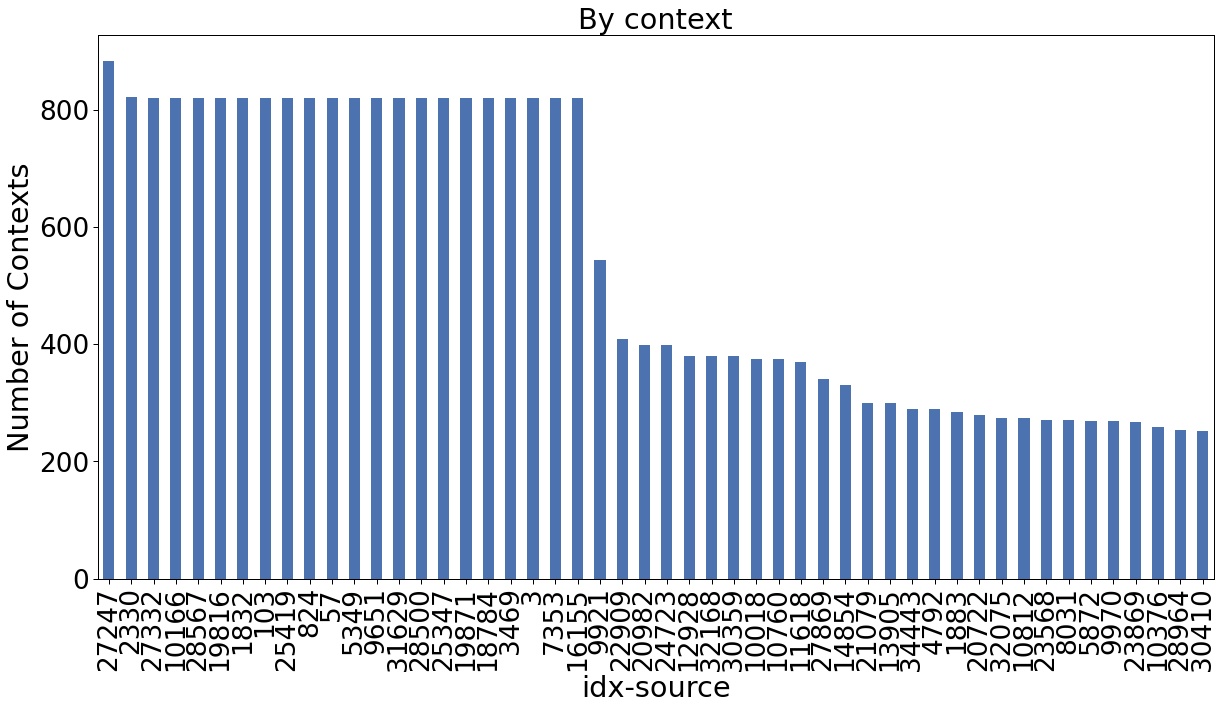

In [12]:
plt.title("By context")
plt.xlabel('Shader ID')
plt.ylabel('Number of Contexts')
df_source_count.sort_values('url', ascending=False).head(50)['url'].plot(kind='bar', figsize=(20, 10))
plt.savefig('fig/results_shader_by_url.pdf', bbox_inches='tight')

In [13]:
# tmp = df_source_count.sort_values('url', ascending=False).head(50)
# bar = tmp['url'].plot(kind='barh', figsize=(30, 50))
# # bar = sns.barplot(x='url_count', y='index', hue='type', data=tmp, orient='h')
# # label length on top of bar
# for rect, url_count, length in zip(bar.patches,tmp['url'],tmp['frame.context.maghsk.shaders.length']):
#     bar.annotate(f'{url_count}',
#                     (rect.get_width(), rect.get_y() + rect.get_height() / 2),
#                     ha='left', va='center')
#     bar.annotate(f'{length}',
#                     (rect.get_width(), rect.get_y() + rect.get_height() / 2),
#                     ha='right', va='center', color='white')

# # plt.figure(figsize=(30, 50))
# plt.title("By URL (length/count)")
# plt.xlabel('Number of URLs')
# plt.ylabel('Shader ID')


### duplicity

In [36]:
df_shaders_trim_dedup

,idx-context,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,frame.url,frame.title,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.sourceTrimedHashed,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.length,frame.context.maghsk.shaders.translatedSourceTrimedHashed,frame.context.maghsk.shaders.translatedSource
0,0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,http://0ldsk00l.ca/,0ldsk00l,vert,e4838c6bcde648aaa04dd0f59d5621b7566915da7dc95f...,#version 300 es\nprecision mediump sampler2DAr...,17898,e8d71030d928ed81b52ace287d1030ece5c45fff3b0459...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\n#ve...
1,0,0,0,['bq'],0,1,0,,http://0ldsk00l.ca/,http://0ldsk00l.ca/,0ldsk00l,frag,f33c97c694e2a34efc049c3b20ee02c025be68ce53772b...,#version 300 es\n#define varying in\nlayout(lo...,61058,980efb27429b4b3566cb366efdf704d25664e0acc4f81a...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\n#...
2,2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,http://1000000-lives.com/,TVアニメ「100万の命の上に俺は立っている」公式サイト,vert,4add4b3ecd9841da6ece0afe52af1e8bccad11d699ee50...,precision highp float;\n#define SHADER_NAME pi...,698,1e92a9757548144d20747fd281181887f4e8b336ccc739...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\npre...
3,2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,http://1000000-lives.com/,TVアニメ「100万の命の上に俺は立っている」公式サイト,frag,b1455c420d8d5c84e928b0f5cbd5b7da1a67ba6e96e340...,precision mediump float;\n#define SHADER_NAME ...,242,5c2cf05c7af1c2119f05be7fbcf645b471336688299c45...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\np...
4,2,2,2,['bq'],0,3,0,,http://1000000-lives.com/,http://1000000-lives.com/,TVアニメ「100万の命の上に俺は立っている」公式サイト,vert,3cb0c32181c705a89e6c7871e908b112385287aba09477...,precision highp float;\n#define SHADER_NAME pi...,428,910a527c1c26b3ced4fa5e996c4a3481def0123b49d00a...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\npre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154148,35088,115065,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,vert,6a6e52704fb925c5f4d2bdc6e413d2040076b8e4288874...,\n #ifdef GL_ES\n precision highp float;\n ...,8654,bd13a5248eb6ff538bb1a3d501cad1f9f86a39dc38bbae...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\n\n ...
154149,35088,115065,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,frag,9c90e08c35f3732722d76347c72ee093df80decf4d66e3...,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,5715,665192c540ce6d8b42e15831f578e29798529a1ee5da0f...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\n#...
154150,35088,115065,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,vert,aa3b49f6d5254c4a3ac3ad1dade792e6559ccbbc75c22e...,#define HAS_UNIFORM_u_fill_color\n#define HAS_...,15154,af355410a7736248572e01577c85df14ab62e8a15260ad...,// VERTEX SHADER BEGIN\n\n// GLSL BEGIN\n\n#de...
154151,35088,115065,29238,['bq'],0,1,1,,https://map.e-zhetisu.kz/,https://map.e-zhetisu.kz/,Геопортал области Жетісу,frag,1c3050469ca68d5f972e329b7e72513130ed8628c6d779...,#define HAS_UNIFORM_u_opacity\n#define HAS_UNI...,4164,8bc702c0352f1534c0c1d860921844c852600d942bc7d4...,// FRAGMENT SHADER BEGIN\n\n// GLSL BEGIN\n\n#...


In [98]:
tmp = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed']
a = tmp.count() - tmp.nunique()
a = a[a>0]
b = a.value_counts().sort_index()
b

frame.context.maghsk.shaders.sourceTrimedHashed
1        599
2       1310
3        180
4        276
5        375
        ... 
510        1
757        1
787        1
846        1
4149       1
Name: count, Length: 114, dtype: int64

<Axes: xlabel='frame.context.maghsk.shaders.sourceTrimedHashed', ylabel='Count'>

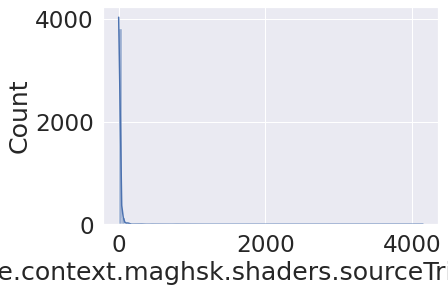

In [99]:
sns.histplot(a, bins=100, kde=True)

In [138]:
from scipy import interpolate
import numpy as np
from scipy.stats import linregress

In [127]:
b.index.max()

4149

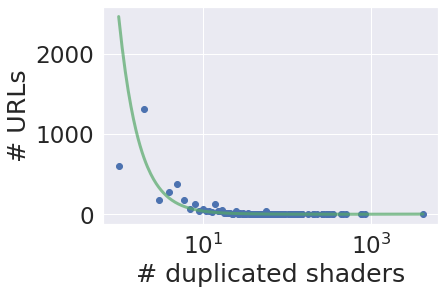

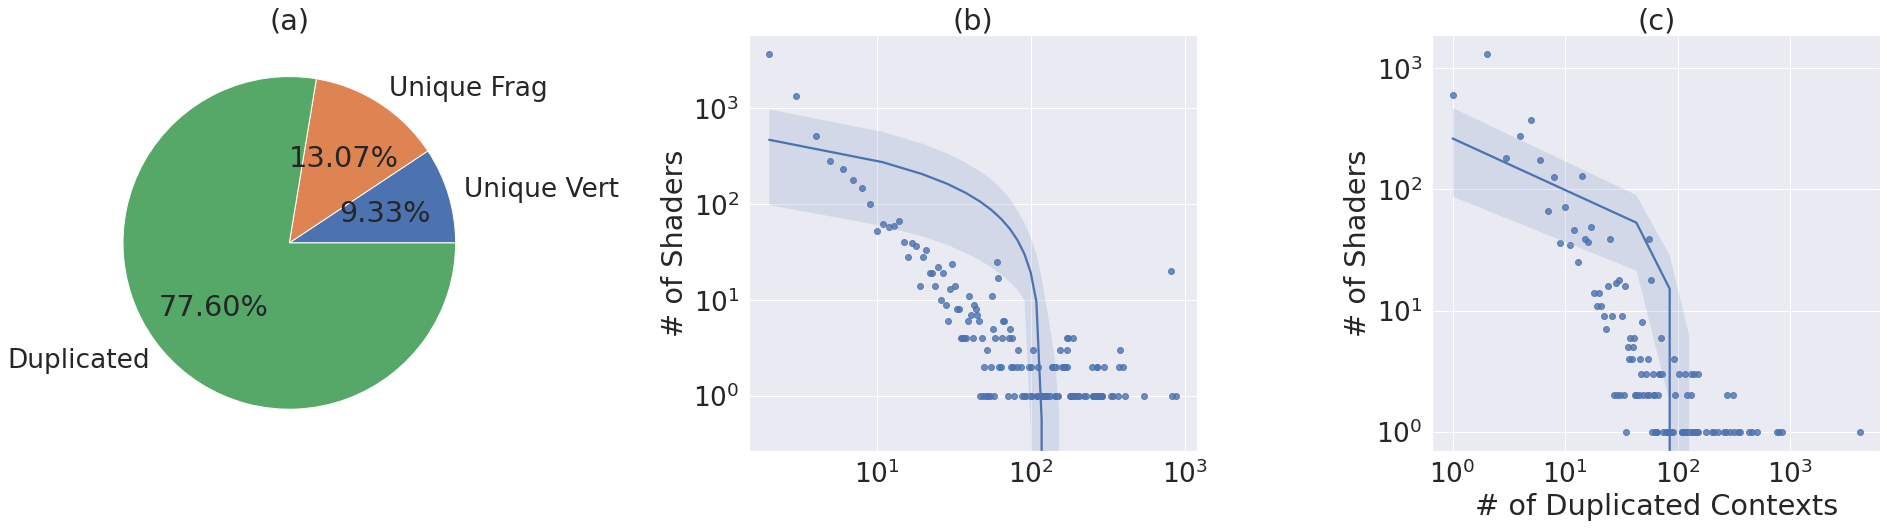

In [176]:
# set font scale
# create figure with four subplots
sns.set(font_scale=2.4)

fig, axes = plt.subplots(1, 3, figsize=(27, 8), )
# add four figures above to the figure
# subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-url'], ['frame.context.maghsk.shaders.sourceTrimedHashed', 'index-context']]
subset = [None, ['frame.context.maghsk.shaders.sourceTrimedHashed', 'url']]
names = ['(a)', 'Overall Duplicity', 'Across Sites Duplicity']
# for i in range(1):
#     if subset[i] is None:
#         df_shaders_trim_dedup = df_shaders_trim
#     else:
#         df_shaders_trim_dedup = df_shaders_trim.drop_duplicates(subset=subset[i], keep='first')
#     # caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
#     dup_vert_ratio = df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='vert'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum()
#     dup_frag_ratio = df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='frag'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum()
#     unique_vert_ratio = (~df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='vert'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first')).sum()
#     unique_frag_ratio = (~df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='frag'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first')).sum()
#     # print("Percentage of all unique shaders by {}: {:.2f}%".format(names[i], ratio*100))
#     # axes[i].pie([dup_vert_ratio, dup_frag_ratio, unique_vert_ratio, unique_frag_ratio], labels=['Dup Vert', 'Dup Frag', 'Unique Vert', 'Unique Frag'], autopct='%.2f%%', startangle=90)
#     axes[i].pie([unique_vert_ratio, unique_frag_ratio, dup_vert_ratio + dup_frag_ratio], labels=['Unique Vert', 'Unique Frag', 'Duplicated'], autopct='%.2f%%', startangle=0)
#     axes[i].set_title(names[i])
df_shaders_trim_dedup = df_shaders_trim
# caculate the duplicity of df_shaders_trim_dedup, by column 'frame.context.maghsk.shaders.sourceTrimedHashed'
dup_vert_ratio = df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='vert'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum()
dup_frag_ratio = df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='frag'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first').sum()
unique_vert_ratio = (~df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='vert'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first')).sum()
unique_frag_ratio = (~df_shaders_trim_dedup[df_shaders_trim_dedup['frame.context.maghsk.shaders.type']=='frag'].duplicated(subset=['frame.context.maghsk.shaders.sourceTrimedHashed'], keep='first')).sum()
# print("Percentage of all unique shaders by {}: {:.2f}%".format(names[i], ratio*100))
# axes[i].pie([dup_vert_ratio, dup_frag_ratio, unique_vert_ratio, unique_frag_ratio], labels=['Dup Vert', 'Dup Frag', 'Unique Vert', 'Unique Frag'], autopct='%.2f%%', startangle=90)
axes[0].pie([unique_vert_ratio, unique_frag_ratio, dup_vert_ratio + dup_frag_ratio], labels=['Unique Vert', 'Unique Frag', 'Duplicated'], autopct='%.2f%%', startangle=0)
axes[0].set_title('(a)')

tmp = df_shaders_trim.groupby('frame.context.maghsk.shaders.sourceTrimedHashed')['url']
a = tmp.nunique()
a = a[a>1]
b = a.value_counts().sort_index()
# spl = interpolate.UnivariateSpline(np.log(b.index), np.log(b.values), k=3)
# axes[1].scatter(b.index, b.values)
# xs = np.arange(b.index.min(), b.index.max(), step=0.1)
# axes[1].plot(xs, np.exp(spl(np.log(xs))), 'g', lw=3, alpha=0.7)
sns.regplot(x=b.index, y=b.values, ax=axes[1], logx=True)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('')
axes[1].set_ylabel('# of Shaders')
# axes[1].set_title('The frequency of occurrence of a single shader across different URLs.')
axes[1].set_title('(b)')

tmp = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed']
a = tmp.count() - tmp.nunique()
a = a[a>0]
b = a.value_counts().sort_index()
# # spl = interpolate.UnivariateSpline(np.log(b.index), np.log(b.values), k=3)
# axes[2].scatter(b.index, b.values)
# xs = np.arange(b.index.min(), b.index.max(), step=0.1)
# # axes[2].plot(xs, np.exp(spl(np.log(xs))), 'g', lw=3, alpha=0.7)
sns.regplot(x=b.index, y=b.values, ax=axes[2], logx=True)
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_xlabel('# of Duplicated Contexts')
axes[2].set_ylabel('# of Shaders')
# axes[2].set_title('The duplicity of a single shader within the same URL.')
axes[2].set_title('(c)')

plt.tight_layout()
plt.savefig('fig/results_shader_duplicity.pdf', bbox_inches='tight')

### shader Count

In [15]:
# shader count in a page
df_shader['frame.context.maghsk.shaders.source']
tmp = df_shader.groupby('idx')['idx'].count()
tmp.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9195.000000
mean       16.285372
std        53.050004
min         1.000000
25%         3.000000
50%         8.000000
75%        20.000000
90%        32.000000
95%        46.000000
99%       115.000000
max      4256.000000
Name: idx, dtype: float64

In [16]:
tmp[tmp==4144]

Series([], Name: idx, dtype: int64)

In [17]:
df_shader[df_shader['idx']==29066]['frame.context.maghsk.shaders.source'].nunique()

107

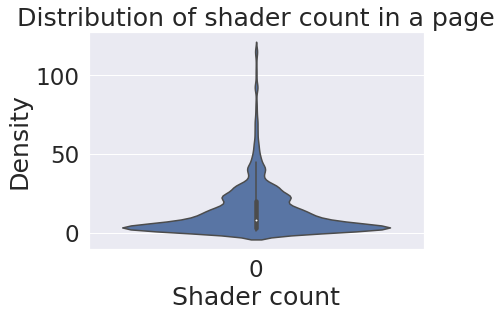

In [18]:
# plot the distribution of tmp
sns.violinplot(tmp[tmp <= 116])
plt.title('Distribution of shader count in a page')
plt.xlabel('Shader count')
plt.ylabel('Density')
plt.savefig('fig/results_shader_count.pdf', bbox_inches='tight')

count    9380.000000
mean       11.568870
std        13.562964
min         1.000000
50%         8.000000
75%        16.000000
90%        24.000000
95%        33.000000
99%        57.210000
max       346.000000
Name: frame.context.maghsk.shaders.sourceTrimedHashed, dtype: float64

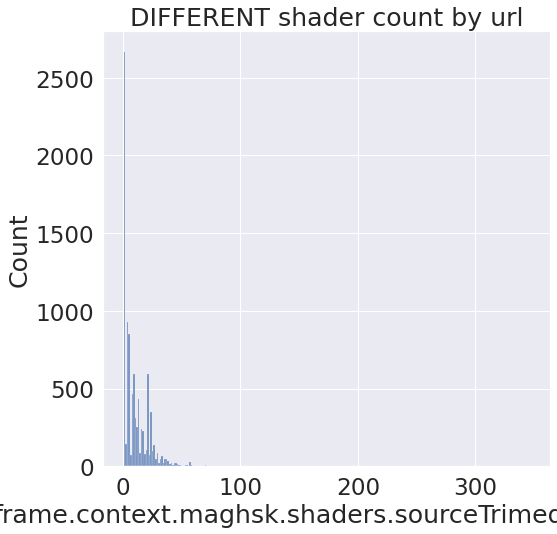

In [19]:
url_shader_count = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed'].nunique()
plt.figure(figsize=(8, 8))
sns.histplot(data=url_shader_count, multiple="stack")
plt.title('DIFFERENT shader count by url')
plt.plot()
url_shader_count.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    9380.000000
mean       16.400107
std        52.858264
min         1.000000
50%         8.000000
75%        20.000000
90%        32.000000
95%        46.000000
99%       115.210000
max      4256.000000
Name: frame.context.maghsk.shaders.sourceTrimedHashed, dtype: float64

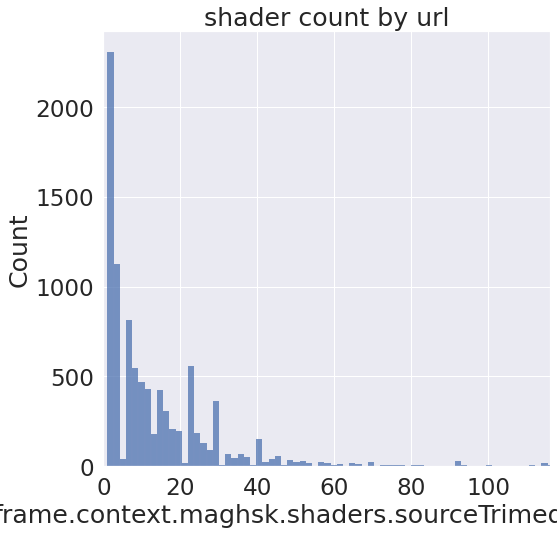

In [20]:
url_shader_count = df_shaders_trim.groupby('url')['frame.context.maghsk.shaders.sourceTrimedHashed'].count()
plt.figure(figsize=(8, 8))
sns.histplot(data=url_shader_count, multiple="stack")
plt.xlim((0, 116))
plt.title('shader count by url')
url_shader_count.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

### shader length

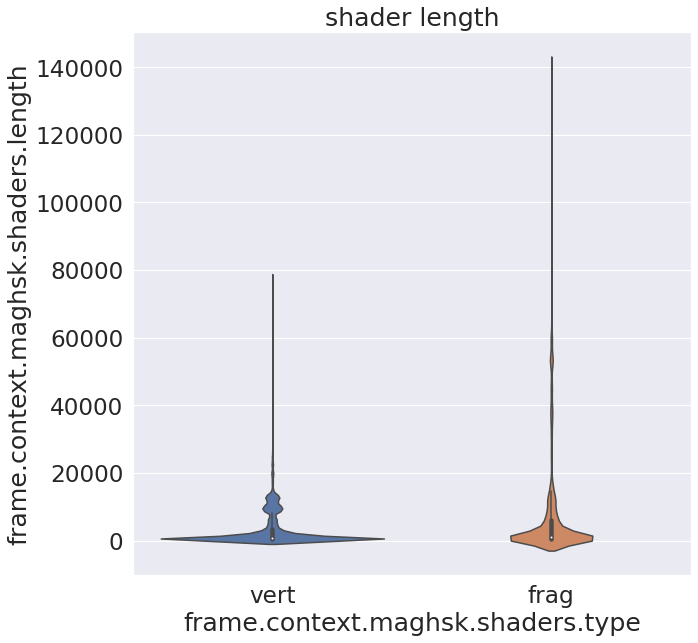

In [21]:
plt.figure(figsize=(10, 10))
# sns.histplot(data=df_shaders_trim_dedup, x="shader_length", hue="shader_type", multiple="layer", element="step")
# sns.violinplot(data=df_shaders_trim, x="shader_type", y="shader_length")
sns.violinplot(data=df_shaders_trim, x="frame.context.maghsk.shaders.type", y="frame.context.maghsk.shaders.length")
plt.title('shader length')
plt.show()

In [22]:
df_shaders_trim['frame.context.maghsk.shaders.length'].describe()

count    153833.000000
mean       5208.756697
std       10990.583324
min          13.000000
25%         428.000000
50%        1043.000000
75%        5122.000000
max      140138.000000
Name: frame.context.maghsk.shaders.length, dtype: float64

#### translated compression ratio

In [23]:
df_shaders_trim['frame.context.maghsk.shaders.length'].describe(percentiles=[0.1, 0.5, 0.75, 0.9, 0.95, 0.99])

count    153833.000000
mean       5208.756697
std       10990.583324
min          13.000000
10%         195.000000
50%        1043.000000
75%        5122.000000
90%       12481.000000
95%       24138.000000
99%       55029.080000
max      140138.000000
Name: frame.context.maghsk.shaders.length, dtype: float64

In [24]:
def get_source_between(s):
    record = False
    ret = []
    for x in s.splitlines():
        if x.startswith('// INITIAL HLSL BEGIN'):
            record = True
            continue
        if x.startswith('// INITIAL HLSL END'):
            record = False
            break
        if record:
            ret.append(x)
    return '\n'.join(ret[1:-1])

In [25]:
print(df_shader.loc[25810]['frame.context.maghsk.shaders.source'])

#version 100
#extension GL_EXT_shader_framebuffer_fetch : enable

    precision highp float;
precision highp int;
uniform 	vec4 _Time;
uniform 	vec4 _UV0RowColumnSpeedOpacity;
uniform 	vec4 _UV1RowColumnSpeedOpacity;
uniform lowp sampler2D _Mask;
uniform lowp sampler3D _DitherMaskLOD;
varying highp vec4 vs_TEXCOORD1;
vec2 u_xlat0;
bool u_xlatb0;
vec2 u_xlat1;
vec2 u_xlat2;
vec3 u_xlat3;
mediump float u_xlat16_4;
vec2 u_xlat5;
vec2 u_xlat10;
mediump float u_xlat16_13;
void main()
{
vec4 hlslcc_FragCoord = vec4(gl_FragCoord.xyz, 1.0/gl_FragCoord.w);
    u_xlat0.x = _UV1RowColumnSpeedOpacity.y * _UV1RowColumnSpeedOpacity.x + -1.0;
    u_xlat0.x = min(u_xlat0.x, 9.99999975e-05);
    u_xlat0.x = _Time.y * _UV1RowColumnSpeedOpacity.z + u_xlat0.x;
    u_xlat1.x = _UV1RowColumnSpeedOpacity.x * _UV1RowColumnSpeedOpacity.y;
    u_xlat0.x = u_xlat0.x / u_xlat1.x;
    u_xlat0.x = fract(u_xlat0.x);
    u_xlat0.y = (-u_xlat0.x) + 1.0;
    u_xlat1.y = _UV1RowColumnSpeedOpacity.x;
    u_xlat0.xy = u_x

In [26]:
l = 0
ttt = df_shader[df_shader['frame.context.maghsk.shaders.length'] > l].dropna(subset=['frame.context.maghsk.shaders.source', 'frame.context.maghsk.shaders.translatedSource'])
ttt = ttt[ttt['frame.context.maghsk.shaders.source'].str.len() > 0]
ttt['frame.context.maghsk.shaders.translatedSource'] = ttt['frame.context.maghsk.shaders.translatedSource'].map(get_source_between)

In [27]:
ttt.iloc[0].to_dict()

{'idx-context': 0,
 'idx-frame': 0,
 'idx': 0,
 'category': "['bq']",
 'label_ERROR': 0,
 'label_usecase': 1,
 'label_interactions': 0,
 'label_comments': '',
 'url': 'http://0ldsk00l.ca/',
 'date': 1683354276886,
 'raf_path': '../2-9.playwright/output/raf/00000.json.gz',
 'frame.url': 'http://0ldsk00l.ca/',
 'frame.title': '0ldsk00l',
 'frame.date': 1683354293396,
 'frame.when': 16505.59999999404,
 'frame.context.maghsk.shaders.id': 0,
 'frame.context.maghsk.shaders.compiled': True,
 'frame.context.maghsk.shaders.source': '#version 300 es\nprecision mediump sampler2DArray;\n#define attribute in\n#define varying out\n#define texture2D texture\nprecision highp float;\nprecision highp int;\n#define HIGH_PRECISION\n#define SHADER_NAME MeshStandardMaterial\n#define STANDARD \n#define USE_FOG\n#define FLAT_SHADED\nuniform mat4 modelMatrix;\nuniform mat4 modelViewMatrix;\nuniform mat4 projectionMatrix;\nuniform mat4 viewMatrix;\nuniform mat3 normalMatrix;\nuniform vec3 cameraPosition;\nunifo

In [28]:
ttt[ttt['frame.context.maghsk.shaders.translatedSource'].str.len() == 0]

,idx-context,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,...,frame.url,frame.title,frame.date,frame.when,frame.context.maghsk.shaders.id,frame.context.maghsk.shaders.compiled,frame.context.maghsk.shaders.source,frame.context.maghsk.shaders.translatedSource,frame.context.maghsk.shaders.type,frame.context.maghsk.shaders.length
25806,4671,15877,4756,['bq'],0,1,1,,https://alpha.branch.gg/,1683364054642,...,https://alpha.castaways.com/?st=hub&s=f9b3af&r...,Castaways,1683364086715,32068.9,5,True,#version 100\n#extension GL_EXT_shader_framebu...,,frag,1022
25810,4671,15877,4756,['bq'],0,1,1,,https://alpha.branch.gg/,1683364054642,...,https://alpha.castaways.com/?st=hub&s=f9b3af&r...,Castaways,1683364086715,32068.9,9,True,#version 100\n#extension GL_EXT_shader_framebu...,,frag,2617
25868,4673,15878,4757,['bq'],0,1,1,,https://alpha.castaways.com/,1683364106349,...,https://alpha.castaways.com/?st=hub&s=f9b3af&r...,Castaways,1683364132213,25859.9,5,True,#version 100\n#extension GL_EXT_shader_framebu...,,frag,1022
25872,4673,15878,4757,['bq'],0,1,1,,https://alpha.castaways.com/,1683364106349,...,https://alpha.castaways.com/?st=hub&s=f9b3af&r...,Castaways,1683364132213,25859.9,9,True,#version 100\n#extension GL_EXT_shader_framebu...,,frag,2617
35560,7293,24319,6902,['bq'],0,1,1,,https://cnergee.com/,1683368144167,...,https://cnergee.com/,CNERGEE | link your resources to technology,1683368165682,21500.4,9,True,precision highp float;\nprecision highp int;\n...,,frag,11881
89138,20552,63240,16184,[awwwards],0,1,1,,https://sougen.co,1683389176027,...,https://sougen.co/,Sougen,1683389199257,23225.8,12,True,#version 300 es\n#extension GL_ANGLE_multi_dra...,,vert,8556
89194,20552,63240,16184,[awwwards],0,1,1,,https://sougen.co,1683389176027,...,https://sougen.co/,Sougen,1683389199257,23225.8,68,True,#version 300 es\n#extension GL_ANGLE_multi_dra...,,vert,8556
109733,25260,78753,20023,[awwwards],0,1,0,scroll,https://www.cartier.com/en-us/immersive-celebr...,1683399318154,...,https://www.cartier.com/en-us/immersive-celebr...,Cartier® Official Website - Jeweler and Watchm...,1683399348433,30274.8,10,True,#version 300 es\nprecision mediump sampler2DAr...,,vert,12992
109735,25260,78753,20023,[awwwards],0,1,0,scroll,https://www.cartier.com/en-us/immersive-celebr...,1683399318154,...,https://www.cartier.com/en-us/immersive-celebr...,Cartier® Official Website - Jeweler and Watchm...,1683399348433,30274.8,12,True,#version 300 es\nprecision mediump sampler2DAr...,,vert,13015
122653,28688,91349,23242,['bq'],0,3,0,,https://www.japan-create.jp/,1683407730084,...,https://www.japan-create.jp/,ジャパンクリエイト株式会社 写真撮影・アルバム制作,1683407772635,42546.7,10,True,precision highp float;\nprecision highp int;\n...,,vert,971


In [29]:
ttt = ttt[ttt['frame.context.maghsk.shaders.translatedSource'].str.len() > 0]
tmp = ttt['frame.context.maghsk.shaders.source'].str.len() / ttt['frame.context.maghsk.shaders.translatedSource'].str.len()
(tmp > 1).sum()

51123

<Axes: >

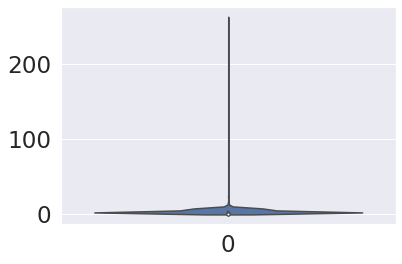

In [30]:
sns.violinplot(tmp)

In [31]:
print(ttt.iloc[0]['frame.context.maghsk.shaders.source'])

#version 300 es
precision mediump sampler2DArray;
#define attribute in
#define varying out
#define texture2D texture
precision highp float;
precision highp int;
#define HIGH_PRECISION
#define SHADER_NAME MeshStandardMaterial
#define STANDARD 
#define USE_FOG
#define FLAT_SHADED
uniform mat4 modelMatrix;
uniform mat4 modelViewMatrix;
uniform mat4 projectionMatrix;
uniform mat4 viewMatrix;
uniform mat3 normalMatrix;
uniform vec3 cameraPosition;
uniform bool isOrthographic;
#ifdef USE_INSTANCING
	attribute mat4 instanceMatrix;
#endif
#ifdef USE_INSTANCING_COLOR
	attribute vec3 instanceColor;
#endif
attribute vec3 position;
attribute vec3 normal;
attribute vec2 uv;
#ifdef USE_UV1
	attribute vec2 uv1;
#endif
#ifdef USE_UV2
	attribute vec2 uv2;
#endif
#ifdef USE_UV3
	attribute vec2 uv3;
#endif
#ifdef USE_TANGENT
	attribute vec4 tangent;
#endif
#if defined( USE_COLOR_ALPHA )
	attribute vec4 color;
#elif defined( USE_COLOR )
	attribute vec3 color;
#endif
#if ( defined( USE_MORPHTARGETS ) && ! 

In [32]:
print(ttt.iloc[0]['frame.context.maghsk.shaders.translatedSource'])

#pragma warning( disable: 3556 3571 )
float3 vec3_ctor(float3 x0)
{
    return float3(x0);
}
float4 vec4_ctor(float3 x0, float x1)
{
    return float4(x0, x1);
}
// Uniforms

uniform float4x4 _modelViewMatrix : register(c0);
uniform float4x4 _projectionMatrix : register(c4);
uniform float3x3 _normalMatrix : register(c8);
#ifdef ANGLE_ENABLE_LOOP_FLATTEN
#define LOOP [loop]
#define FLATTEN [flatten]
#else
#define LOOP
#define FLATTEN
#endif

#define ATOMIC_COUNTER_ARRAY_STRIDE 4

// Attributes
static float3 _position = {0, 0, 0};
static float3 _normal = {0, 0, 0};

static float4 gl_Position = float4(0, 0, 0, 0);

// Varyings
static  float3 _vViewPosition = {0, 0, 0};
static  float _vFogDepth = {0};

cbuffer DriverConstants : register(b1)
{
    float4 dx_ViewAdjust : packoffset(c1);
    float2 dx_ViewCoords : packoffset(c2);
    float2 dx_ViewScale  : packoffset(c3);
    float clipControlOrigin : packoffset(c3.w);
    float clipControlZeroToOne : packoffset(c4);
};

@@ VERTEX ATTRIBUTES 

<Axes: >

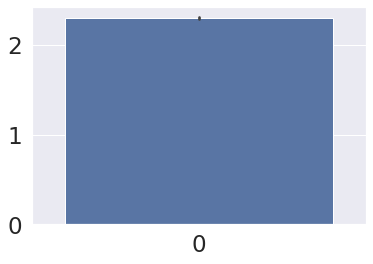

In [33]:
tmp = ttt['frame.context.maghsk.shaders.translatedSource'].str.len() / ttt['frame.context.maghsk.shaders.source'].str.len()
sns.barplot(tmp)

76277


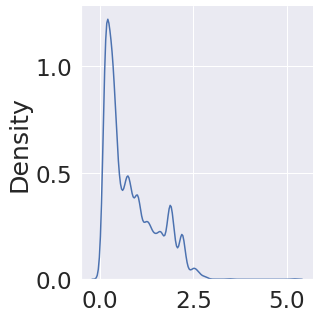

In [34]:
tmp1 = tmp[ttt['frame.context.maghsk.shaders.source'].str.len() > 1024]
print(len(tmp1))
# sns.violinplot(tmp1.values)
sns.displot(tmp1, kind="kde")

41632
count    41632.000000
mean         0.399856
std          0.307243
min          0.003821
25%          0.178544
50%          0.305821
75%          0.487563
max          3.504749
dtype: float64


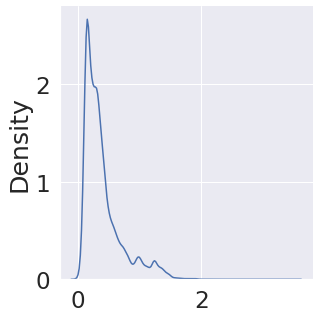

In [35]:
tmp1 = tmp[ttt['frame.context.maghsk.shaders.source'].str.len() > 4096]
print(len(tmp1))
print(tmp1.describe())
# sns.violinplot(tmp1.values)
sns.displot(tmp1, kind="kde")